`02_pandas3.ipynb`

# 시계열 (Time Series) 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 다양한 날짜 형식 데이터 변환 시도
date_strings = [
    '2025년8월6일',
    '15/01/2023',
    'Jan 15, 2023',
    '2023-01-15',
    '2023.01.15',
    '2025/08/05',
    '20230115',
    '15-Jan-2023',
]

for date in date_strings:
    # 예외 처리 (에러 처리)
    try:  # 일단 아래 블럭 해봐. 되면 좋고,
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except:  # 안되면 뻗지 말고, 아래 코드 실행해
        print('err', date)

err 2025년8월6일
15/01/2023 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
2023-01-15 -> 2023-01-15 00:00:00
2023.01.15 -> 2023-01-15 00:00:00
2025/08/05 -> 2025-08-05 00:00:00
20230115 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00


In [29]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
daily_sales.describe()


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:


C:\Users\user\AppData\Local\Temp\ipykernel_32244\253335917.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


,sales
count,365.000000
mean,100198.928044
std,28661.811822
min,10125.079840
25%,80326.143973
50%,99915.026123
75%,121116.561656
max,185004.875006


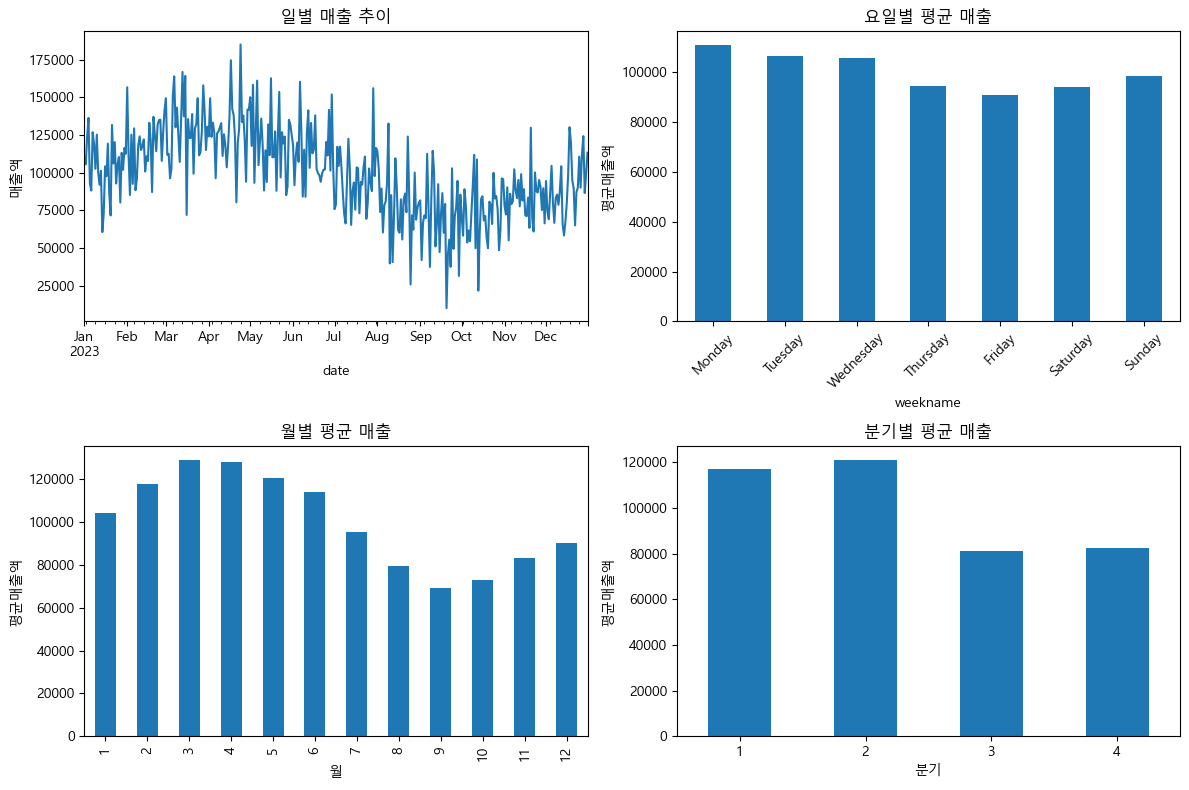

In [66]:
# Index (datetime index 라서 바로 접근)
daily_sales['year'] = daily_sales.index.year  # 년
daily_sales['month'] = daily_sales.index.month  # 월
daily_sales['day'] = daily_sales.index.day  # 일
daily_sales['weekday'] = daily_sales.index.weekday  # 요일, 월=0
daily_sales['weekname'] = daily_sales.index.day_name()  # 요일, 얘만 함수
daily_sales['quarter'] = daily_sales.index.quarter  # 분기

daily_sales.head()

# 요일별 평균 매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()
# 원하는 순서대로 Series 나 DF 인덱스의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)

# 시각화
plt.figure(figsize=(12, 8))

# 일별 매출 추이
plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')
plt.xticks(rotation=45)

# 월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균매출액')

# 분기별 매출 평균
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='bar')
plt.title('분기별 평균 매출')
plt.xticks(rotation=0)
plt.xlabel('분기')
plt.ylabel('평균매출액')

# Layout 겹치지 않게 조정
plt.tight_layout()
plt.show()